<a href="https://colab.research.google.com/github/kshitj79/Code-Clause-Demand-Forecasting-For-Reatil-Stores./blob/main/Demand_Forecasting_For_Reatil_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('Store.csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418.0,99.0375,111.8625,0.0,0.0,20.0
1,2,17/01/11,8091,216419.0,99.0375,99.0375,0.0,0.0,28.0
2,3,17/01/11,8091,216425.0,133.9500,133.9500,0.0,0.0,19.0
3,4,17/01/11,8091,216233.0,133.9500,133.9500,0.0,0.0,44.0
4,5,17/01/11,8091,217390.0,141.0750,141.0750,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...
61148,86529,16/01/12,9890,245338.0,498.0375,498.0375,0.0,0.0,25.0
61149,86530,16/01/12,9890,547934.0,160.3125,160.3125,0.0,0.0,5.0
61150,86531,16/01/12,9909,216418.0,89.0625,105.4500,1.0,1.0,148.0
61151,86532,16/01/12,9909,216419.0,89.0625,106.1625,1.0,1.0,110.0


In [3]:
df[['day','month','year']] = df['week'].str.split('/',expand=True)
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418.0,99.0375,111.8625,0.0,0.0,20.0,17,01,11
1,2,17/01/11,8091,216419.0,99.0375,99.0375,0.0,0.0,28.0,17,01,11
2,3,17/01/11,8091,216425.0,133.9500,133.9500,0.0,0.0,19.0,17,01,11
3,4,17/01/11,8091,216233.0,133.9500,133.9500,0.0,0.0,44.0,17,01,11
4,5,17/01/11,8091,217390.0,141.0750,141.0750,0.0,0.0,52.0,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
61148,86529,16/01/12,9890,245338.0,498.0375,498.0375,0.0,0.0,25.0,16,01,12
61149,86530,16/01/12,9890,547934.0,160.3125,160.3125,0.0,0.0,5.0,16,01,12
61150,86531,16/01/12,9909,216418.0,89.0625,105.4500,1.0,1.0,148.0,16,01,12
61151,86532,16/01/12,9909,216419.0,89.0625,106.1625,1.0,1.0,110.0,16,01,12


In [4]:
df = df.drop('week',axis=1)
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418.0,99.0375,111.8625,0.0,0.0,20.0,17,01,11
1,2,8091,216419.0,99.0375,99.0375,0.0,0.0,28.0,17,01,11
2,3,8091,216425.0,133.9500,133.9500,0.0,0.0,19.0,17,01,11
3,4,8091,216233.0,133.9500,133.9500,0.0,0.0,44.0,17,01,11
4,5,8091,217390.0,141.0750,141.0750,0.0,0.0,52.0,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
61148,86529,9890,245338.0,498.0375,498.0375,0.0,0.0,25.0,16,01,12
61149,86530,9890,547934.0,160.3125,160.3125,0.0,0.0,5.0,16,01,12
61150,86531,9909,216418.0,89.0625,105.4500,1.0,1.0,148.0,16,01,12
61151,86532,9909,216419.0,89.0625,106.1625,1.0,1.0,110.0,16,01,12


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
df = df.dropna(subset=['units_sold'])

X, y = df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [7]:
model.score(X_test, y_test)

0.7487738174562559

In [8]:
from sklearn.metrics import root_mean_squared_error
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

rmse


31.931050454325344

In [9]:
df.units_sold.describe()

,units_sold
count,61152.000000
mean,52.505756
std,65.344925
min,1.000000
25%,20.000000
50%,36.000000
75%,62.000000
max,2876.000000


<Axes: >

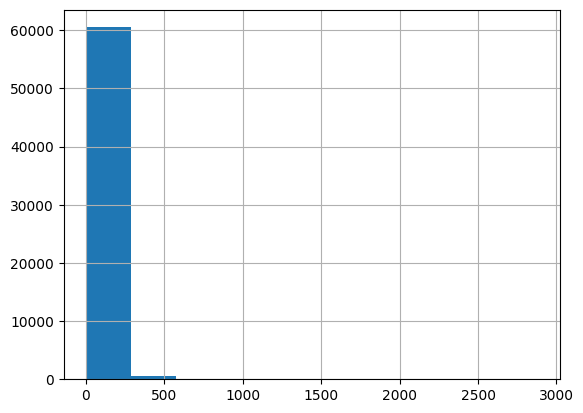

In [10]:
df.units_sold.hist()

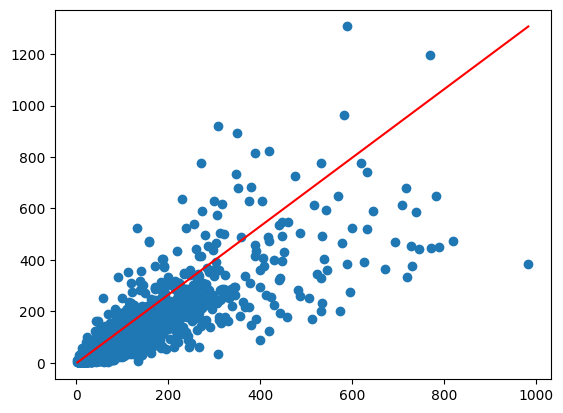

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()),color='red')

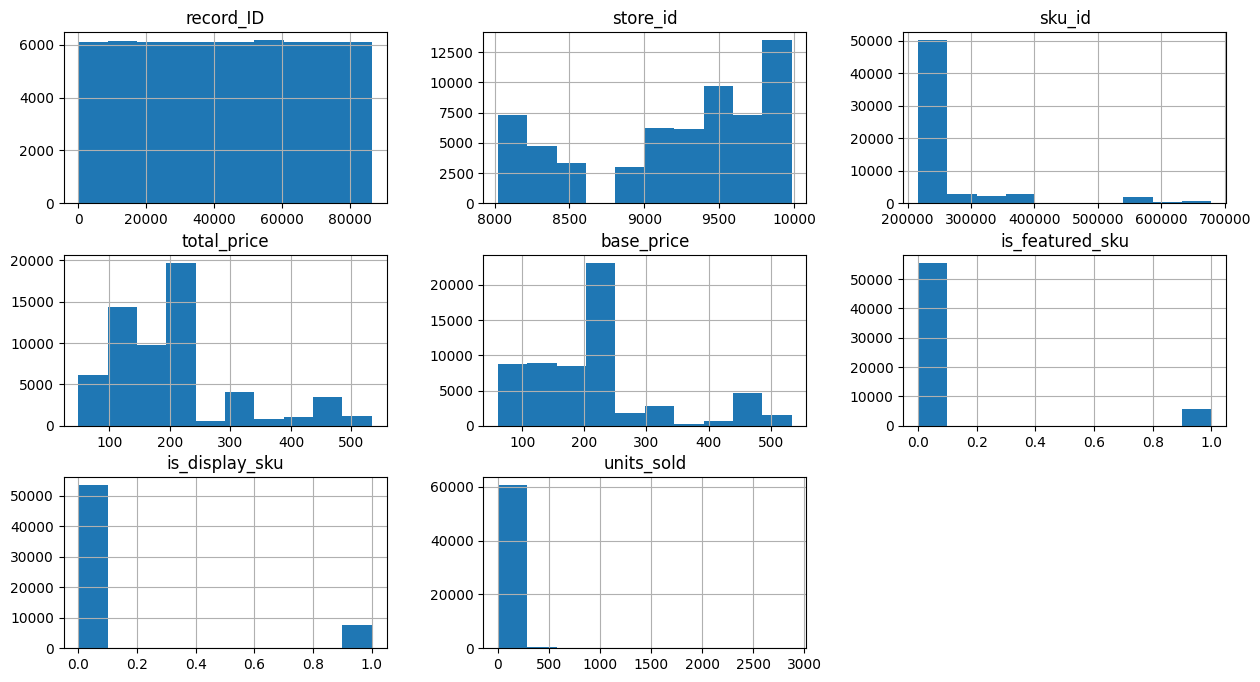

In [12]:
df.hist(figsize=(15,8))
plt.show()

In [13]:
if 'record_ID' in df.columns:
    df = df.drop('record_ID', axis=1)
else:
    print("Column 'record_ID' not found in DataFrame.")

In [14]:
len(df.store_id.unique())

76

In [15]:
len(df.sku_id.unique())

28

In [16]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]


<Axes: >

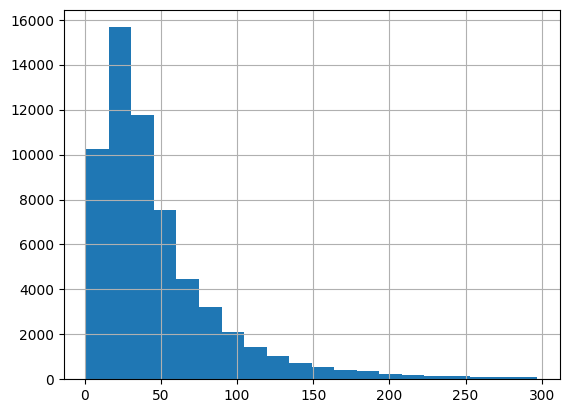

In [17]:
df.units_sold.hist(bins=20)

In [18]:
df.join(pd.get_dummies(df.store_id, prefix = 'store')).drop('store_id', axis=1)
df.join(pd.get_dummies(df.sku_id, prefix = 'sku')).drop('sku_id', axis=1)

,store_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,sku_216233.0,...,sku_320485.0,sku_327492.0,sku_378934.0,sku_398721.0,sku_545621.0,sku_546789.0,sku_547934.0,sku_600934.0,sku_673209.0,sku_679023.0
0,8091,99.0375,111.8625,0.0,0.0,20.0,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,8091,99.0375,99.0375,0.0,0.0,28.0,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,8091,133.9500,133.9500,0.0,0.0,19.0,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,8091,133.9500,133.9500,0.0,0.0,44.0,17,01,11,True,...,False,False,False,False,False,False,False,False,False,False
4,8091,141.0750,141.0750,0.0,0.0,52.0,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61147,9890,208.7625,208.7625,0.0,0.0,79.0,16,01,12,False,...,False,False,False,False,False,False,False,False,False,False
61148,9890,498.0375,498.0375,0.0,0.0,25.0,16,01,12,False,...,False,False,False,False,False,False,False,False,False,False
61149,9890,160.3125,160.3125,0.0,0.0,5.0,16,01,12,False,...,False,False,False,False,False,False,True,False,False,False
61150,9909,89.0625,105.4500,1.0,1.0,148.0,16,01,12,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
model = RandomForestRegressor(n_jobs=-1)

X, y= df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [20]:
model.score(X_test, y_test)

0.8051138449096411

In [21]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

rmse

19.117795753859543

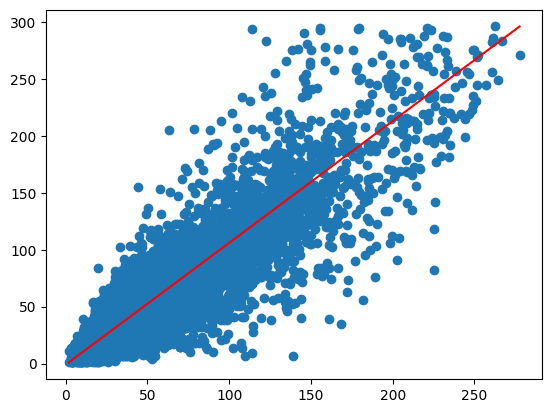

In [22]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()),color='red')

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2, 3]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.4s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.5s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.6s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   3.0s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   1.9s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [24]:
best_model = grid_search.best_estimator_
grid_search.best_params_
best_model.score(X_test, y_test)

0.8004783867511405